<a href="https://colab.research.google.com/github/perezoso001/ChatGPT-Reviews-Analysis/blob/main/ChatGPT_Reviews_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import requests

#Importing review data from CSV
file_id = '1D91HXUPcp-2FFs151Bp8Fpr_M48OmvnU'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

display(df.head())

,Review Id,Review,Ratings,Review Date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [30]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
display(df.head())

,review_id,review,ratings,review_date
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39


In [31]:
# Handle missing values
df['review'].fillna('no review provided', inplace=True)

display(df.isnull().sum())

/tmp/ipython-input-2420689781.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review'].fillna('no review provided', inplace=True)


,0
review_id,0
review,0
ratings,0
review_date,0


In [32]:
# Ensure data types are appropriate
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196727 entries, 0 to 196726
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    196727 non-null  object        
 1   review       196727 non-null  object        
 2   ratings      196727 non-null  int64         
 3   review_date  196727 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.0+ MB


None

## Calculate sentiment polarity and subjectivity


In [33]:
from textblob import TextBlob

df['polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

display(df.head())

,review_id,review,ratings,review_date,polarity,subjectivity
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,0.600000
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,0.600000
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,1.000000
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,1.000000
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,0.542949


## Categorize sentiment


In [34]:
def categorize_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['polarity'].apply(categorize_sentiment)

display(df.head())

,review_id,review,ratings,review_date,polarity,subjectivity,sentiment_category
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,0.600000,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,0.600000,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,1.000000,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,1.000000,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,0.542949,Positive


## Visualize sentiment distribution


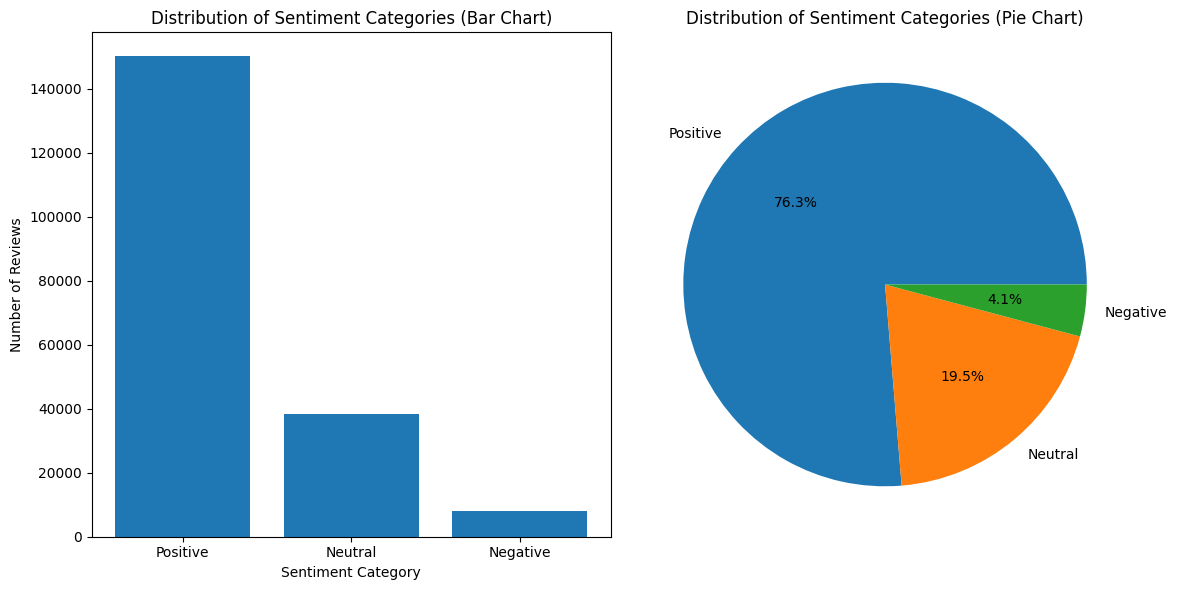

In [35]:
import matplotlib.pyplot as plt

sentiment_counts = df['sentiment_category'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Sentiment Categories (Bar Chart)')

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sentiment Categories (Pie Chart)')

plt.tight_layout()
plt.show()

## Compare sentiment with ratings


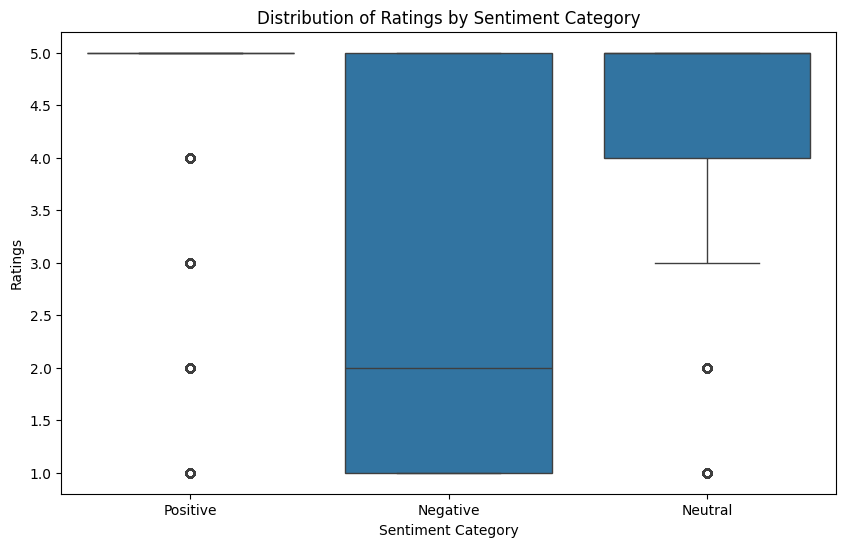

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment_category', y='ratings', data=df)
plt.xlabel('Sentiment Category')
plt.ylabel('Ratings')
plt.title('Distribution of Ratings by Sentiment Category')
plt.show()

## Filter positively rated reviews


In [38]:
positive_reviews_df = df[df['sentiment_category'] == 'Positive']
display(positive_reviews_df.head())
display(positive_reviews_df.shape)

,review_id,review,ratings,review_date,polarity,subjectivity,sentiment_category
0,6fb93778-651a-4ad1-b5ed-67dd0bd35aac,good,5,2024-08-23 19:30:05,0.7000,0.600000,Positive
1,81caeefd-3a28-4601-a898-72897ac906f5,good,5,2024-08-23 19:28:18,0.7000,0.600000,Positive
2,452af49e-1d8b-4b68-b1ac-a94c64cb1dd5,nice app,5,2024-08-23 19:22:59,0.6000,1.000000,Positive
3,372a4096-ee6a-4b94-b046-cef0b646c965,"nice, ig",5,2024-08-23 19:20:50,0.6000,1.000000,Positive
4,b0d66a4b-9bde-4b7c-8b11-66ed6ccdd7da,"this is a great app, the bot is so accurate to...",5,2024-08-23 19:20:39,0.4125,0.542949,Positive


(150122, 7)

## Extract frequently mentioned positive keywords and phrases


In [39]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigram_matrix = vectorizer.fit_transform(positive_reviews_df['review'])

bigram_df = pd.DataFrame(bigram_matrix.sum(axis=0).T, index=vectorizer.get_feature_names_out(), columns=['frequency'])
bigram_df = bigram_df.sort_values(by='frequency', ascending=False)

display("Top 20 Bigrams:")
display(bigram_df.head(20))

'Top 20 Bigrams:'

,frequency
good app,5886
best app,4913
nice app,3327
great app,3130
chat gpt,2672
best ai,2491
love app,1860
amazing app,1560
useful app,1219
really good,1189


## Visualize positive terms


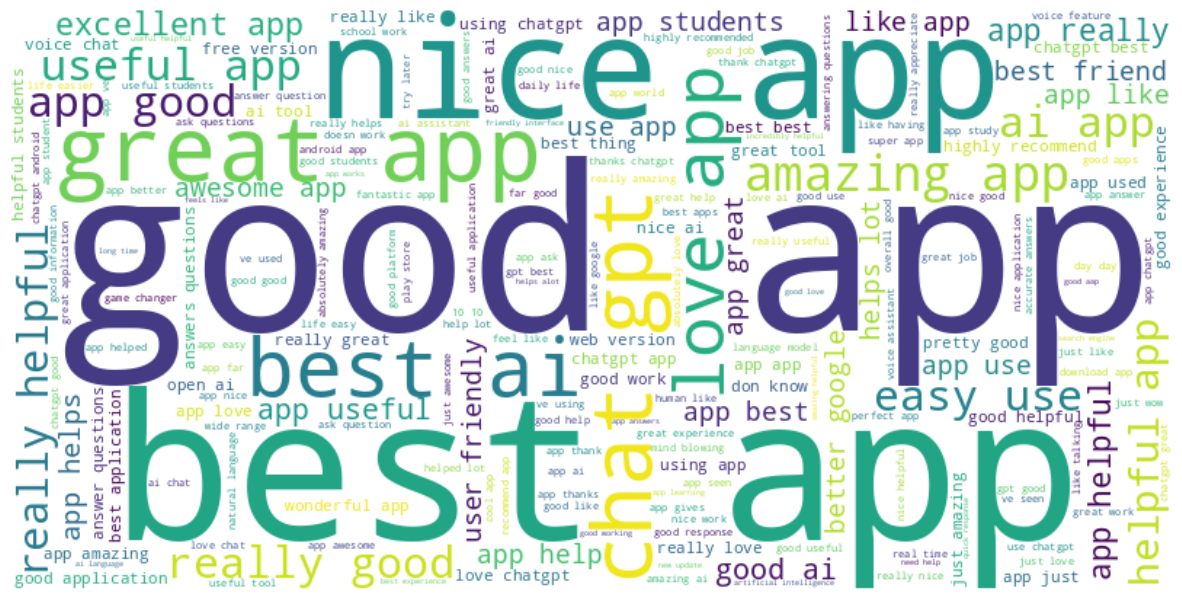

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_df['frequency'])

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Visualize sentiment trends over time


/tmp/ipython-input-2356386894.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sentiment_trends = df.set_index('review_date').resample('M')['sentiment_category'].value_counts().unstack(fill_value=0)


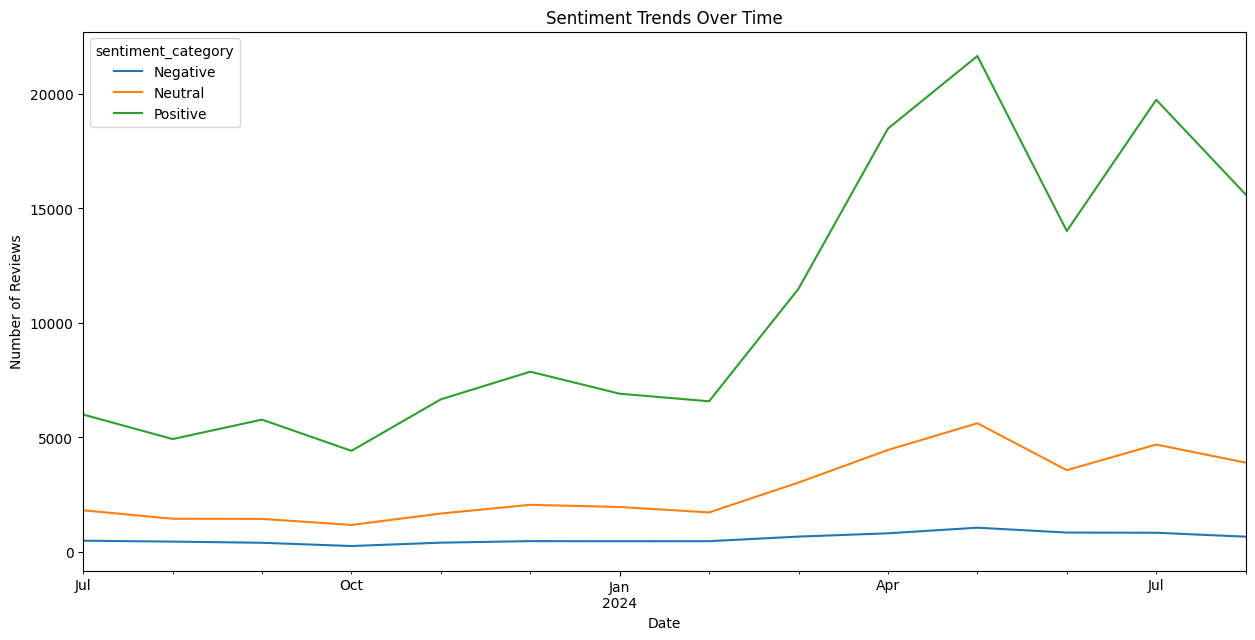

In [41]:
sentiment_trends = df.set_index('review_date').resample('M')['sentiment_category'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(15, 7))
sentiment_trends.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

## Visualize subjectivity distribution


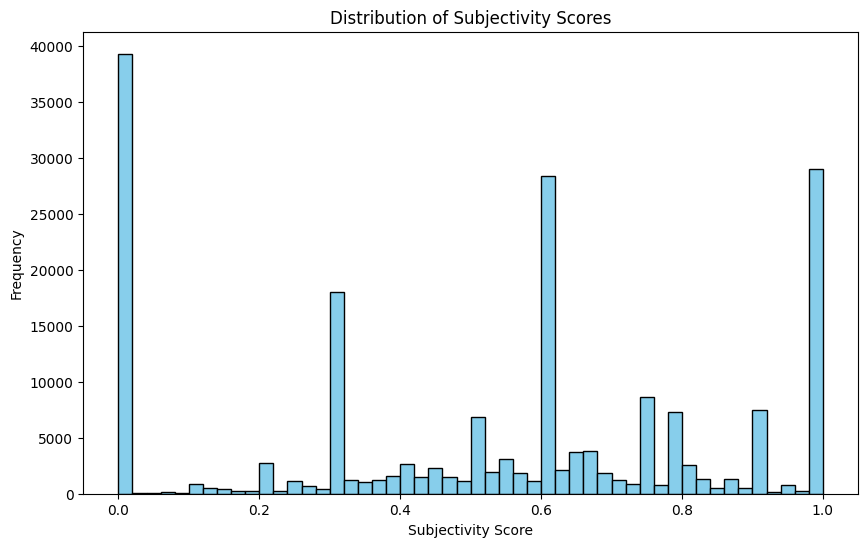

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(df['subjectivity'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.show()

## Visualize keyword frequencies

<Figure size 1200x800 with 0 Axes>

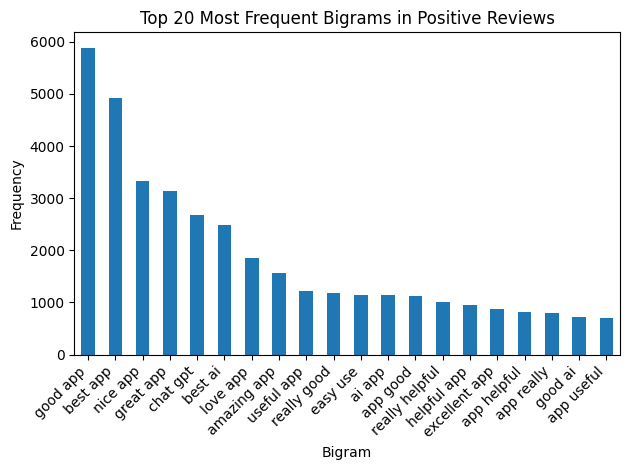

In [43]:
plt.figure(figsize=(12, 8))
bigram_df.head(20).plot(kind='bar', legend=False)
plt.title('Top 20 Most Frequent Bigrams in Positive Reviews')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Sentiment Distribution:

The majority of reviews are categorized as Positive, followed by Neutral and Negative. This suggests a generally positive sentiment towards ChatGPT among the reviewers.
Sentiment vs. Ratings: The boxplot shows a clear relationship between sentiment category and ratings, with Positive reviews having the highest median rating (5), Neutral reviews having a lower median rating (around 4), and Negative reviews having the lowest median rating (around 1-2). This aligns with expectations and reinforces the sentiment categorization.
Positive Keywords: The most frequent bigrams in positive reviews highlight aspects like "good app", "best app", "nice app", and "great app", indicating that users are generally satisfied with the application itself. Terms like "chat gpt" and "best ai" suggest positive feedback related to the AI capabilities.
Sentiment Trends: The sentiment trends over time show fluctuations in the number of reviews, but the proportion of positive, neutral, and negative sentiments appears relatively consistent throughout the period, with positive reviews consistently dominating.
Subjectivity Distribution: The histogram of subjectivity scores shows a wide range of subjectivity in the reviews, with a peak around 0, indicating a significant number of factual or objective reviews, but also a considerable number of subjective opinions.

#Overall Conclusion:

The analysis of ChatGPT reviews reveals a predominantly positive user sentiment, strongly correlated with higher ratings. Users frequently praise the application itself and its AI capabilities. While there's a mix of objective and subjective feedback, the overall picture is positive, with sentiment trends remaining relatively stable over time.